In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("cy3.xlsx")
count = 0
cells = ["E21", "E22", "E23", "E24", "D21", "D22", "D23", "D24"]
cell_col = []

#replace 340 with row in which the first table begins
row = df.iloc[419]
row = row.astype(str).str.strip()

for cell in cells[:4]:
    cell_col.append(row[row == cell].index[0])

row = df.iloc[324]
row = row.astype(str).str.strip()

for cell in cells[4:]:
    cell_col.append(row[row == cell].index[0])

print(cell_col)
all_bins = []

for i in range(len(cell_col)):
    reads = []
    current_read = []

    col = df[cell_col[i]]
    for val in col:
        if pd.notna(val) and isinstance(val, int):
            current_read.append(val)
        else:
            if current_read:
                reads.append(current_read)
                current_read = []
    
    all_bins.append(reads)

['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97']


In [4]:
print(all_bins[7])

[[472, 439, 341, 467, 411, 493, 444, 520, 579, 467, 423, 448, 473, 386, 544, 406, 507, 440, 313, 431, 312, 511, 416, 267, 319, 656, 327, 479, 545, 523, 470, 482, 373, 317, 434, 378, 288, 303, 308, 338, 417, 400, 696, 380, 195, 469, 321, 357, 420, 229, 409, 451, 331, 235, 276, 453, 343, 239, 456, 287, 349, 303, 508, 399, 283, 411, 190, 100, 136, 134, 189, 287, 491, 313, 352, 309, 332, 177, 239, 285, 203, 327, 381, 134, 554, 304, 74, 86, 107, 307, 185], [521, 485, 468, 490, 581, 517, 551, 453, 540, 641, 491, 557, 342, 500, 485, 502, 498, 533, 460, 454, 507, 537, 484, 386, 450, 367, 671, 636, 555, 541, 645, 459, 361, 545, 582, 374, 374, 503, 498, 443, 458, 494, 387, 413, 425, 456, 284, 397, 351, 590, 441, 521, 358, 360, 438, 320, 365, 315, 276, 325, 568, 181, 416, 350, 203, 222, 623, 200, 293, 151, 499, 552, 58, 193, 102, 259, 64, 343, 231, 106, 80, 354, 262, 141, 221, 149, 93, 112, 202, 212, 112], [470, 531, 616, 682, 722, 497, 393, 600, 490, 645, 700, 551, 488, 389, 667, 515, 385, 279, 

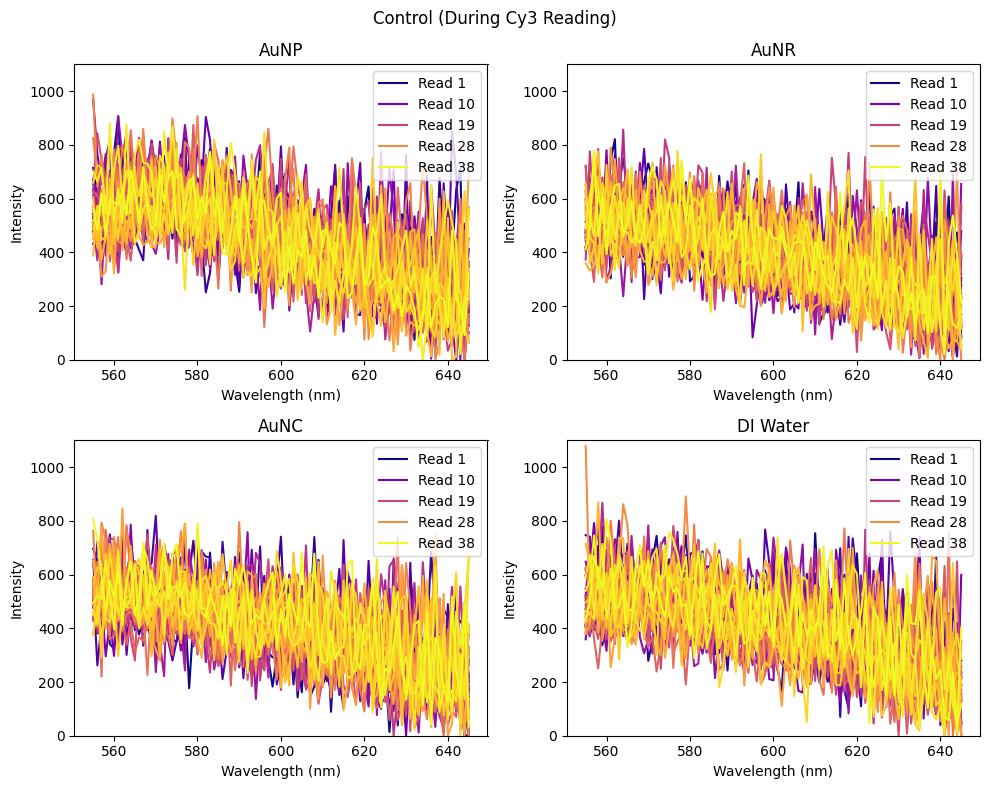

In [5]:
import numpy as np
wavelength = range(555, 646)
n = len(all_bins[0][:38])
gray_colors = [str(i) for i in np.linspace(0.3, 0.7, n-1)]

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.plasma  # purple → orange
colors = [cmap(i) for i in np.linspace(0, 1, n)]

fig, axes = plt.subplots(2, 2, figsize = (10,8))
axes = axes.flatten()

lines = []

for i, read in enumerate(all_bins[0][:38]):
    line, = axes[0].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Intensity")
axes[0].set_title("AuNP")
axes[0].legend(selected_lines, selected_labels)

lines = []

for i, read in enumerate(all_bins[1][:38]):
    line, = axes[1].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("Intensity")
axes[1].set_title("AuNR")
axes[1].legend(selected_lines, selected_labels)

lines = []

for i, read in enumerate(all_bins[2][:38]):
    line, = axes[2].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("Intensity")
axes[2].set_title("AuNC")
axes[2].legend(selected_lines, selected_labels)

lines = []

for i, read in enumerate(all_bins[3][:38]):
    line, = axes[3].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[3].set_xlabel("Wavelength (nm)")
axes[3].set_ylabel("Intensity")
axes[3].set_title("DI Water")
axes[3].legend(selected_lines, selected_labels)

for i in range(0, 4):
    axes[i].set_ylim(0, 1100)

fig.suptitle("Control (During Cy3 Reading)")
plt.tight_layout()
plt.show()

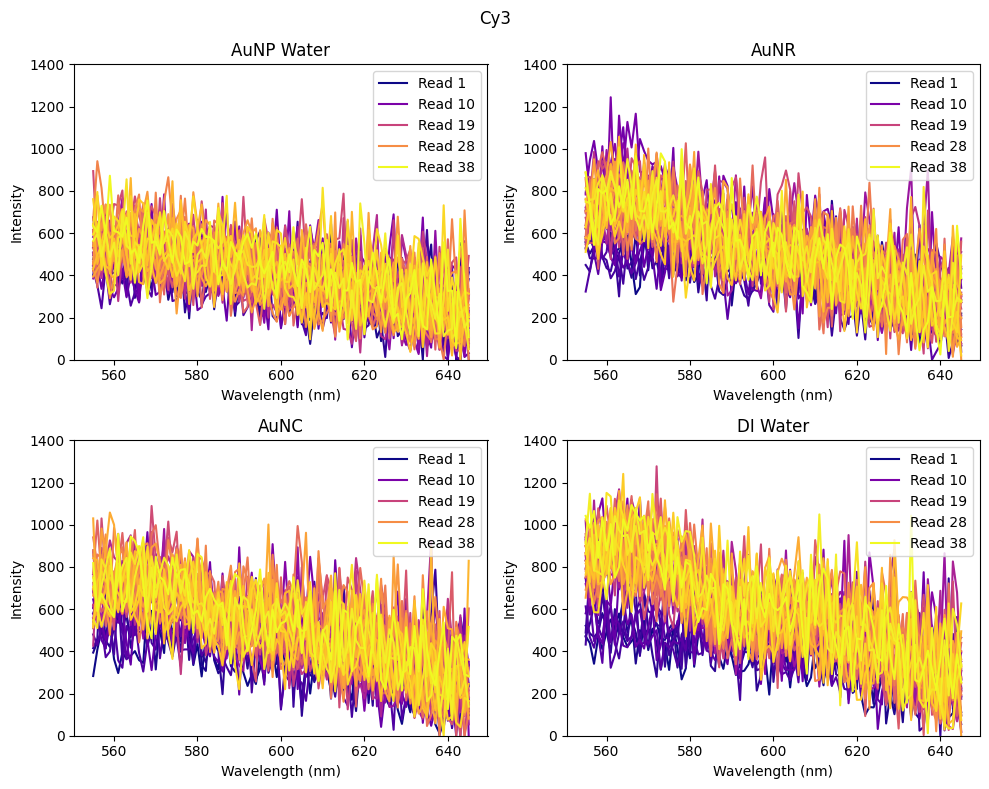

In [6]:
import numpy as np
wavelength = range(555, 646)
n = len(all_bins[4])
gray_colors = [str(i) for i in np.linspace(0.3, 0.7, n-1)]

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.plasma  # purple → orange
colors = [cmap(i) for i in np.linspace(0, 1, n)]

fig, axes = plt.subplots(2, 2, figsize = (10,8))
axes = axes.flatten()

lines = []

for i, read in enumerate(all_bins[4]):
    line, = axes[0].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Intensity")
axes[0].set_title("AuNP Water")
axes[0].legend(selected_lines, selected_labels)

lines = []

for i, read in enumerate(all_bins[5]):
    line, = axes[1].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("Intensity")
axes[1].set_title("AuNR")
axes[1].legend(selected_lines, selected_labels)

lines = []

for i, read in enumerate(all_bins[6]):
    line, = axes[2].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("Intensity")
axes[2].set_title("AuNC")
axes[2].legend(selected_lines, selected_labels)

lines = []

for i, read in enumerate(all_bins[7]):
    line, = axes[3].plot(wavelength, read, color=colors[i], label=f'Read {i+1}')
    lines.append(line)


num_labels = 5  # how many you want in the legend
indices = np.linspace(0, n-1, num_labels, dtype=int)

selected_lines = [lines[i] for i in indices]
selected_labels = [f"Read {i+1}" for i in indices]

axes[3].set_xlabel("Wavelength (nm)")
axes[3].set_ylabel("Intensity")
axes[3].set_title("DI Water")
axes[3].legend(selected_lines, selected_labels)

for i in range(0, 4):
    axes[i].set_ylim(0, 1400)

fig.suptitle("Cy3")
plt.tight_layout()
plt.show()

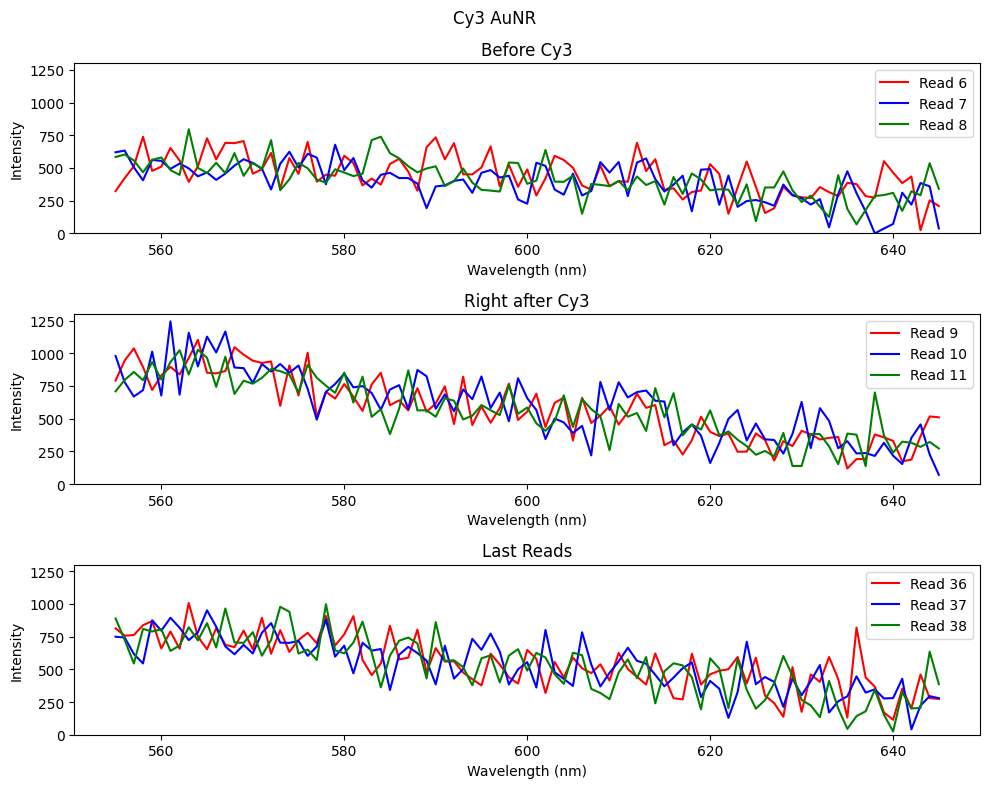

In [7]:
import numpy as np
wavelength = range(555, 646)
n = len(all_bins[5])
gray_colors = [str(i) for i in np.linspace(0.3, 0.7, n-1)]

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.plasma  # purple → orange
colors = [cmap(i) for i in np.linspace(0, 1, n)]

colors = ["red", "blue", "green"]
fig, axes = plt.subplots(3, 1, figsize = (10,8))
axes = axes.flatten()

lines = []

for i, read in enumerate(all_bins[5][5:8]):
    line, = axes[0].plot(wavelength, read, color=colors[i], label=f'Read {i+6}')
    lines.append(line)

axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Intensity")
axes[0].set_title("Before Cy3")
axes[0].legend()


lines = []

for i, read in enumerate(all_bins[5][8:11]):
    line, = axes[1].plot(wavelength, read, color=colors[i], label=f'Read {i+9}')
    lines.append(line)

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("Intensity")
axes[1].set_title("Right after Cy3")
axes[1].legend()


lines = []

for i, read in enumerate(all_bins[5][35:]):
    line, = axes[2].plot(wavelength, read, color=colors[i], label=f'Read {i+36}')
    lines.append(line)

axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("Intensity")
axes[2].set_title("Last Reads")
axes[2].legend()

for i in range(0, 3):
    axes[i].set_ylim(0, 1300)

fig.suptitle("Cy3 AuNR")
plt.tight_layout()
plt.show()

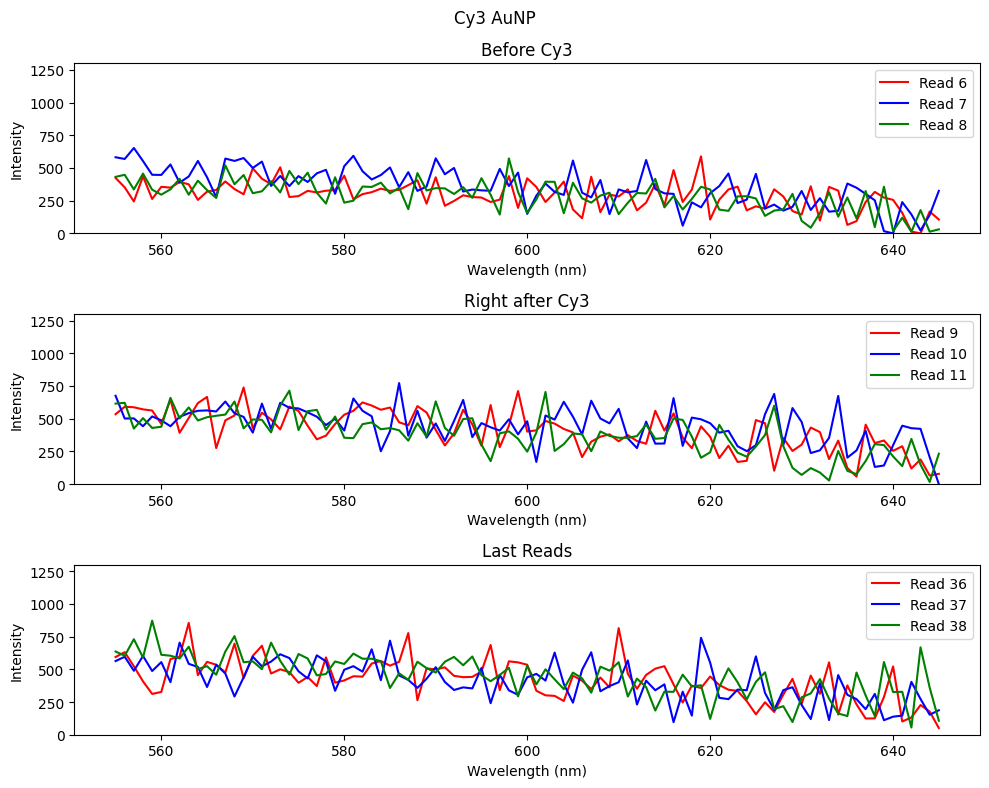

In [8]:
import numpy as np
wavelength = range(555, 646)
n = len(all_bins[4])
gray_colors = [str(i) for i in np.linspace(0.3, 0.7, n-1)]

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.plasma  # purple → orange
colors = [cmap(i) for i in np.linspace(0, 1, n)]

colors = ["red", "blue", "green"]
fig, axes = plt.subplots(3, 1, figsize = (10,8))
axes = axes.flatten()

lines = []

for i, read in enumerate(all_bins[4][5:8]):
    line, = axes[0].plot(wavelength, read, color=colors[i], label=f'Read {i+6}')
    lines.append(line)

axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Intensity")
axes[0].set_title("Before Cy3")
axes[0].legend()


lines = []

for i, read in enumerate(all_bins[4][8:11]):
    line, = axes[1].plot(wavelength, read, color=colors[i], label=f'Read {i+9}')
    lines.append(line)

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("Intensity")
axes[1].set_title("Right after Cy3")
axes[1].legend()


lines = []

for i, read in enumerate(all_bins[4][35:]):
    line, = axes[2].plot(wavelength, read, color=colors[i], label=f'Read {i+36}')
    lines.append(line)

axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("Intensity")
axes[2].set_title("Last Reads")
axes[2].legend()

for i in range(0, 3):
    axes[i].set_ylim(0, 1300)

fig.suptitle("Cy3 AuNP")
plt.tight_layout()
plt.show()

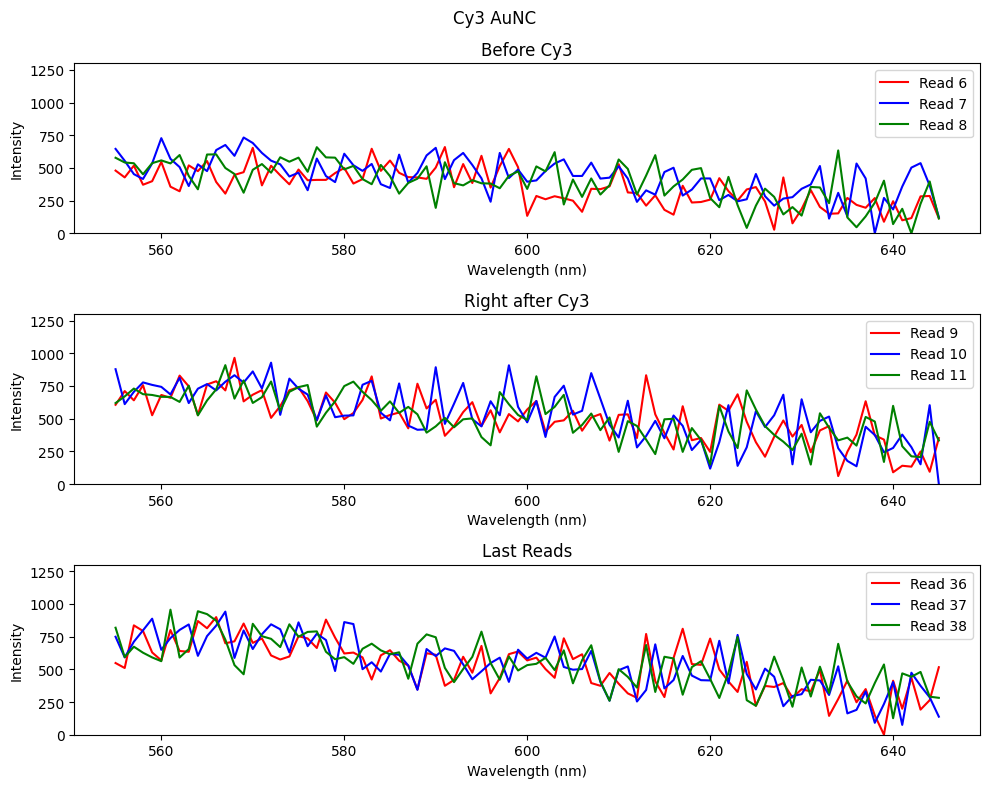

In [9]:
import numpy as np
wavelength = range(555, 646)
n = len(all_bins[6])
gray_colors = [str(i) for i in np.linspace(0.3, 0.7, n-1)]

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.plasma  # purple → orange
colors = [cmap(i) for i in np.linspace(0, 1, n)]

colors = ["red", "blue", "green"]
fig, axes = plt.subplots(3, 1, figsize = (10,8))
axes = axes.flatten()

lines = []

for i, read in enumerate(all_bins[6][5:8]):
    line, = axes[0].plot(wavelength, read, color=colors[i], label=f'Read {i+6}')
    lines.append(line)

axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Intensity")
axes[0].set_title("Before Cy3")
axes[0].legend()


lines = []

for i, read in enumerate(all_bins[6][8:11]):
    line, = axes[1].plot(wavelength, read, color=colors[i], label=f'Read {i+9}')
    lines.append(line)

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("Intensity")
axes[1].set_title("Right after Cy3")
axes[1].legend()


lines = []

for i, read in enumerate(all_bins[6][35:]):
    line, = axes[2].plot(wavelength, read, color=colors[i], label=f'Read {i+36}')
    lines.append(line)

axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("Intensity")
axes[2].set_title("Last Reads")
axes[2].legend()

for i in range(0, 3):
    axes[i].set_ylim(0, 1300)

fig.suptitle("Cy3 AuNC")
plt.tight_layout()
plt.show()

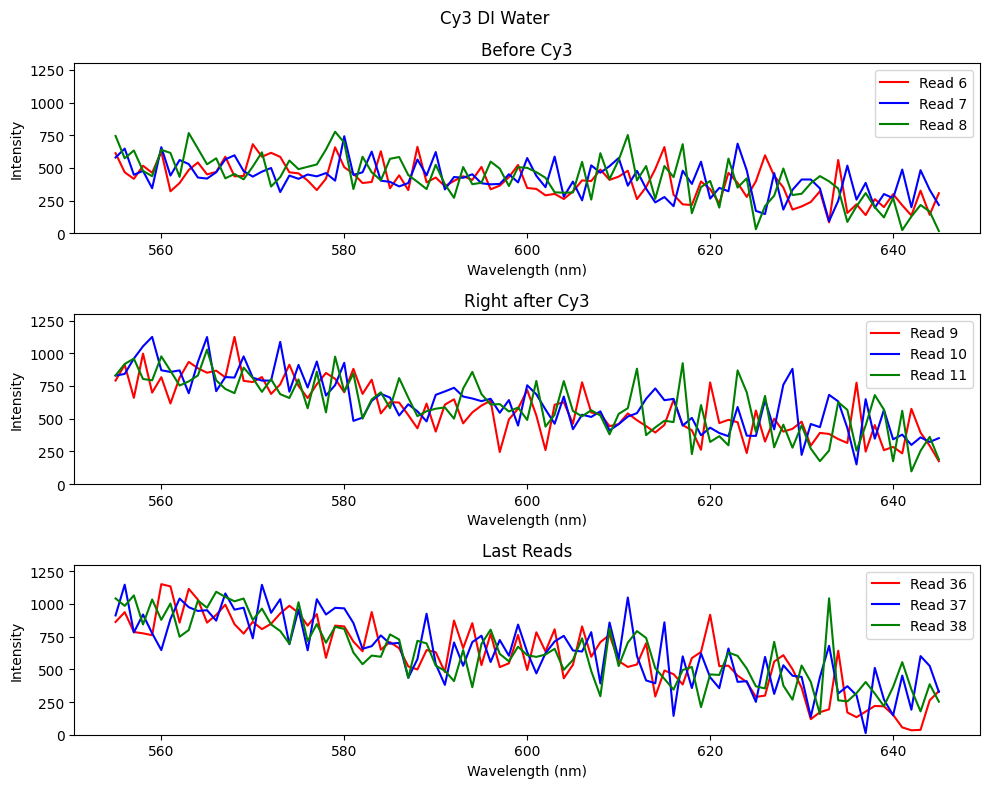

In [ ]:
import numpy as np
wavelength = range(555, 646)
n = len(all_bins[7])
gray_colors = [str(i) for i in np.linspace(0.3, 0.7, n-1)]

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.plasma  # purple → orange
colors = [cmap(i) for i in np.linspace(0, 1, n)]

colors = ["red", "blue", "green"]
fig, axes = plt.subplots(3, 1, figsize = (10,8))
axes = axes.flatten()

lines = []

for i, read in enumerate(all_bins[7][5:8]):
    line, = axes[0].plot(wavelength, read, color=colors[i], label=f'Read {i+6}')
    lines.append(line)

axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("Intensity")
axes[0].set_title("Before Cy3")
axes[0].legend()


lines = []

for i, read in enumerate(all_bins[7][8:11]):
    line, = axes[1].plot(wavelength, read, color=colors[i], label=f'Read {i+9}')
    lines.append(line)

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("Intensity")
axes[1].set_title("Right after Cy3")
axes[1].legend()


lines = []

for i, read in enumerate(all_bins[7][35:]):
    line, = axes[2].plot(wavelength, read, color=colors[i], label=f'Read {i+36}')
    lines.append(line)

axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("Intensity")
axes[2].set_title("Last Reads")
axes[2].legend()

for i in range(0, 3):
    axes[i].set_ylim(0, 1300)

fig.suptitle("Cy3 DI Water")
plt.tight_layout()

plt.show()

In [17]:
#Wavelength of 565
#AUNP
read6 = all_bins[4][5][9]
read7 = all_bins[4][6][9]
read8 = all_bins[4][7][9]
avg_pre_AUNP = (read6 + read7 + read8) / 3

read9 = all_bins[4][8][9]
read10 = all_bins[4][9][9]
read11 = all_bins[4][10][9]
avg_post_AUNP = (read9 + read10 + read11) / 3

read36 = all_bins[4][35][9]
read37 = all_bins[4][36][9]
read38 = all_bins[4][37][9]
avg_final_AUNP = (read36 + read37 + read38) / 3
#AUNR
read6 = all_bins[5][5][9]
read7 = all_bins[5][6][9]
read8 = all_bins[5][7][9]
avg_pre_AUNR = (read6 + read7 + read8) / 3

read9 = all_bins[5][8][9]
read10 = all_bins[5][9][9]
read11 = all_bins[5][10][9]
avg_post_AUNR = (read9 + read10 + read11) / 3

read36 = all_bins[5][35][9]
read37 = all_bins[5][36][9]
read38 = all_bins[5][37][9]
avg_final_AUNR = (read36 + read37 + read38) / 3
#AUNC
read6 = all_bins[6][5][9]
read7 = all_bins[6][6][9]
read8 = all_bins[6][7][9]
avg_pre_AUNC = (read6 + read7 + read8) / 3

read9 = all_bins[6][8][9]
read10 = all_bins[6][9][9]
read11 = all_bins[6][10][9]
avg_post_AUNC = (read9 + read10 + read11) / 3

read36 = all_bins[6][35][9]
read37 = all_bins[6][36][9]
read38 = all_bins[6][37][9]
avg_final_AUNC = (read36 + read37 + read38) / 3
#DI WATER
read6 = all_bins[7][5][9]
read7 = all_bins[7][6][9]
read8 = all_bins[7][7][9]
avg_pre_DI = (read6 + read7 + read8) / 3

read9 = all_bins[7][8][9]
read10 = all_bins[7][9][9]
read11 = all_bins[7][10][9]
avg_post_DI = (read9 + read10 + read11) / 3

read36 = all_bins[7][35][9]
read37 = all_bins[7][36][9]
read38 = all_bins[7][37][9]
avg_final_DI = (read36 + read37 + read38) / 3

print("AUNP PRE: " + str(avg_pre_AUNP))
print("AUNP POST: " + str(avg_post_AUNP))
print("AUNP FINAL: " + str(avg_final_AUNP))

print("AUNR PRE: " + str(avg_pre_AUNR))
print("AUNR POST: " + str(avg_post_AUNR))
print("AUNR FINAL: " + str(avg_final_AUNR))

print("AUNC PRE: " + str(avg_pre_AUNC))
print("AUNC POST: " + str(avg_post_AUNC))
print("AUNC FINAL: " + str(avg_final_AUNC))

print("DI PRE: " + str(avg_pre_DI))
print("DI POST: " + str(avg_post_DI))
print("DI FINAL: " + str(avg_final_DI))

AUNP PRE: 404.3333333333333
AUNP POST: 555.0
AUNP FINAL: 491.6666666666667
AUNR PRE: 483.3333333333333
AUNR POST: 1009.3333333333334
AUNR FINAL: 751.3333333333334
AUNC PRE: 447.0
AUNC POST: 593.6666666666666
AUNC FINAL: 805.3333333333334
DI PRE: 539.0
DI POST: 882.6666666666666
DI FINAL: 1001.6666666666666
